# Cuckoo Search (CS):

The Cuckoo Search (CS) algorithm is inspired by the brood parasitism behavior of cuckoos, which lay their eggs in the nests of other bird species. The optimization process in CS uses Lévy flights to explore the search space, enabling the algorithm to effectively search globally and avoid being trapped in local minima. This approach is widely applicable in continuous optimization problems such as engineering design, machine learning, and data mining.

# Pseudocode

1. Initialize Parameters:
    - n_nests: Number of nests (candidate solutions)
    - p_a: Discovery probability (probability of abandoning the worst nests)
    - n_iter: Number of iterations
    - min_bound: Minimum bounds for the variables
    - max_bound: Maximum bounds for the variables

2. Initialize Population:
    - Generate an initial population of nests with random positions within the bounds.
    - Initialize the fitness of each nest using the objective function (evaluate the fitness of the current solutions).

3. Evaluate Fitness:
    - For each nest, evaluate the fitness (quality) of the solution using the objective function.

4. For each iteration from 1 to n_iter:
    - For each nest i:
        a. Generate a new solution using Lévy flight (to explore new possible solutions).
        b. Apply boundary checks to ensure the new solution is within the feasible search space (within bounds).
        c. Evaluate the fitness of the new solution.
        d. If the new solution has a better fitness value than the current nest (solution), replace the old nest with the new one.
    - After evaluating all nests, update the global best solution (if needed).

5. Abandon Worst Nests:
    - With probability p_a, abandon the worst nests and replace them with new random nests.

6. Output the Best Solution:
    - After completing all iterations, output the best solution found during the optimization process.


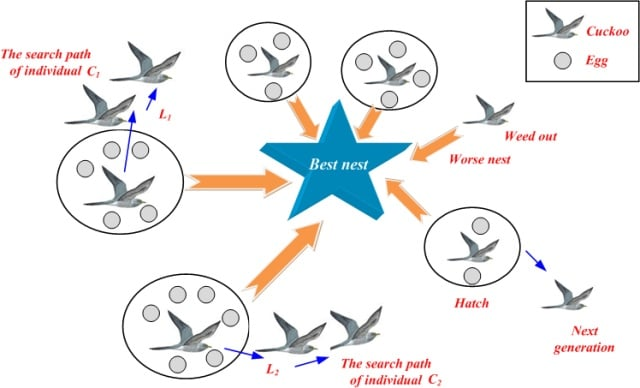

In [9]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf'],     # Type of kernel
}

# Create an SVM classifier
svm = SVC()

# Create a GridSearchCV object to perform hyperparameter tuning
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9714285714285715

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [12]:
import numpy as np
from scipy.special import gamma  # Import gamma from scipy.special

# Objective function to minimize (for example, Rastrigin function)
def objective_function(x):
    return np.sum(x**2 - 10 * np.cos(2 * np.pi * x) + 10)

# Generate initial population (nests)
def initialize_nests(n, dim, lb, ub):
    nests = lb + (ub - lb) * np.random.rand(n, dim)
    return nests

# Levy flight (random walk for cuckoo movement)
def levy_flight(beta=1.5):
    sigma = (gamma(1 + beta) * np.sin(np.pi * beta / 2) / gamma((1 + beta) / 2) * beta * np.cos(np.pi * beta / 2))**(1 / beta)
    u = np.random.normal(0, sigma, size=(1,))
    v = np.random.normal(0, 1, size=(1,))
    step = u / np.abs(v)**(1 / beta)
    return step

# Cuckoo Search algorithm
def cuckoo_search(obj_func, n=25, dim=5, lb=-5, ub=5, max_iter=100, pa=0.25):
    nests = initialize_nests(n, dim, lb, ub)
    fitness = np.apply_along_axis(obj_func, 1, nests)
    best_nest = nests[np.argmin(fitness)]
    best_fitness = np.min(fitness)

    for i in range(max_iter):
        new_nests = nests.copy()

        # Generate new nests by Levy flights
        for j in range(n):
            step = levy_flight()
            new_nests[j, :] = nests[j, :] + step * (nests[j, :] - best_nest)

            # Bound the new nests within the search space
            new_nests[j, :] = np.clip(new_nests[j, :], lb, ub)

        # Evaluate the new nests
        new_fitness = np.apply_along_axis(obj_func, 1, new_nests)

        # Randomly replace nests with a probability of pa
        for j in range(n):
            if np.random.rand() < pa:
                nests[j, :] = new_nests[j, :]
                fitness[j] = new_fitness[j]

        # Update the best nest
        min_fitness_idx = np.argmin(fitness)
        if fitness[min_fitness_idx] < best_fitness:
            best_fitness = fitness[min_fitness_idx]
            best_nest = nests[min_fitness_idx, :]

    return best_nest, best_fitness

# Run the Cuckoo Search algorithm
best_solution, best_value = cuckoo_search(objective_function)
print("C NEHA- 1BM22CS074")
print("Best Solution:", best_solution)
print("Best Fitness Value:", best_value)


C NEHA- 1BM22CS074
Best Solution: [nan nan nan nan nan]
Best Fitness Value: 46.84998696618294


<ipython-input-12-65aca4b15b78>:15: RuntimeWarning: invalid value encountered in scalar power
  sigma = (gamma(1 + beta) * np.sin(np.pi * beta / 2) / gamma((1 + beta) / 2) * beta * np.cos(np.pi * beta / 2))**(1 / beta)
